In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
stations = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

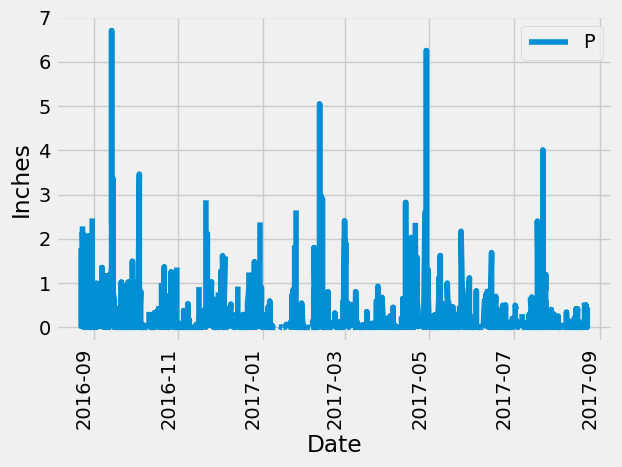

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt


# Calculate the date one year from the last date in data set.
date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).where(measurement.date >= date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation)


# Sort the dataframe by date
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])
precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='prcp', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend("Precipitation")

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
count = precipitation_df['prcp'].count()
mean = precipitation_df['prcp'].mean()
std = precipitation_df['prcp'].std()
min = precipitation_df['prcp'].min()
max = precipitation_df['prcp'].max()
low_qrt = precipitation_df['prcp'].quantile(.25)
mid_qrt = precipitation_df['prcp'].quantile(.5)
hi_qrt = precipitation_df['prcp'].quantile(.75)

summary_dict = { 'Precipitation': [count,  mean,  std,  min,  low_qrt,  mid_qrt,  hi_qrt,  max]}
index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
summary_df = pd.DataFrame(summary_dict, index=index)
summary_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(stations.station).group_by(stations.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.min(measurement.tobs), func.avg(measurement.tobs)).where(measurement.station == 'USC00519281').all()

[(54.0, 54.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

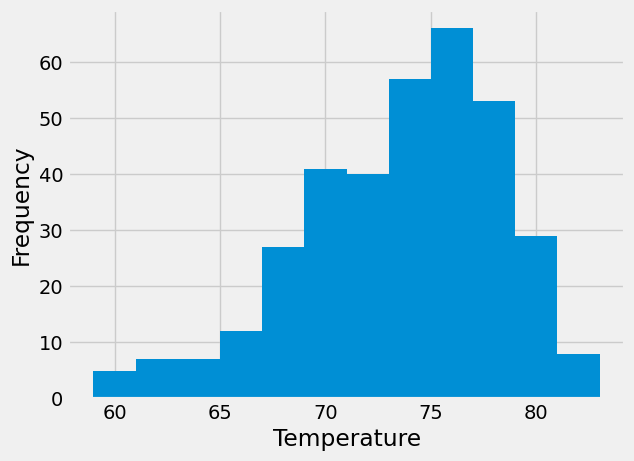

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_num = 'USC00519281'
date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

temperature = session.query(measurement.tobs).where(measurement.date >= date, measurement.station == station_num).all()

temperature_df = pd.DataFrame(temperature)

plt.hist(temperature_df, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [16]:
# Close Session
session.close()